In [194]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import setup_logging, style
plt.style.use(style.notebook)
import h5py

from pmesh.pm import ParticleMesh, RealField, ComplexField

from nbodykit.source.catalog import ArrayCatalog
from nbodykit.source.catalog import HDFCatalog
from nbodykit.lab import ArrayMesh

In [195]:
from astropy.cosmology import Planck18 as cosmo

In [196]:
def read_dat_file(file_path):
    # Assuming the data in the .dat file is space-separated
    data = np.loadtxt(file_path)
    return data

def read_h5_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        dataset = file[dataset_name]
        data = np.array(dataset)
    return data

In [197]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/output2000/lcdm_pk00' + str(x)+'_delta.dat')
    d4000 = read_dat_file('/Users/Io_1/Desktop/gevolution/output4000/lcdm_pk00' + str(x)+'_delta.dat')
    d8000 = read_dat_file('/Users/Io_1/Desktop/gevolution/output8000/lcdm_pk00' + str(x)+'_delta.dat')
    d8000_80 = read_dat_file('/Users/Io_1/Desktop/gevolution/output1/lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d4000, d8000, d8000_80

num_files = 4
delta2000 = []
delta4000 = []
delta8000 = []
delta8000_80 = []

for i in range(num_files):
    d2000, d4000, d8000, d8000_80 = data_getter(i)
    delta2000.append(d2000)
    delta4000.append(d4000)
    delta8000.append(d8000)
    delta8000_80.append(d8000_80)


def get_dataset_names(file_path):
    with h5py.File(file_path, 'r') as file:
        dataset_names = list(file.keys())
    return dataset_names

def h5_getter(x):
    data2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output2000/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    data4000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output4000/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    data8000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output8000/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    return data2000, data4000, data8000

snaps2000 = []
snaps4000 = []
snaps8000 = []

for i in np.arange(num_files):
    data2000, data4000, data8000 = h5_getter(i)
    snaps2000.append(data2000)
    snaps4000.append(data4000)
    snaps8000.append(data8000)

In [198]:
data2000 =[]
data4000 = []
data8000 = []
for i in np.arange(4): 

    position2000 =[]
    position4000 =[]
    position8000 =[]
    mass =[]

#had to multiply all positions by boxsize to rescale it....
    for j in np.arange(len(snaps2000[i]['positionX'])):
        position2000.append([snaps2000[i]['positionX'][j]*2000, snaps2000[i]['positionY'][j]*2000, snaps2000[i]['positionZ'][j]*2000])
        position4000.append([snaps4000[i]['positionX'][j]*4000, snaps4000[i]['positionY'][j]*4000, snaps4000[i]['positionZ'][j]*4000])
        position8000.append([snaps8000[i]['positionX'][j]*8000, snaps8000[i]['positionY'][j]*8000, snaps8000[i]['positionZ'][j]*8000])
        mass.append(1.19036133e-6)
        
    data2 = numpy.empty(len(snaps2000[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data2['Position'] = np.array(position2000)
    data2['Mass'] = np.array(mass)
    data4 = numpy.empty(len(snaps4000[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data4['Position'] = np.array(position4000)
    data4['Mass'] = np.array(mass)
    data8 = numpy.empty(len(snaps8000[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data8['Position'] = np.array(position8000)
    data8['Mass'] = np.array(mass)

    data2000.append(data2)
    data4000.append(data4)
    data8000.append(data8)

array2000 = []
array4000 = []
array8000 = []

for i in np.arange(4):
    f2 = ArrayCatalog(data2000[i])
    mesh2 = f2.to_mesh(Nmesh=120, BoxSize=2000)
    r2 = FFTPower(mesh2, mode='1d', dk=0.005, kmin=0.00001)
    Pk2 = r2.power
    array2000.append(Pk2)

    f4 = ArrayCatalog(data4000[i])
    mesh4 = f4.to_mesh(Nmesh=120, BoxSize=4000)
    r4 = FFTPower(mesh4, mode='1d', dk=0.005, kmin=0.00001)
    Pk4 = r4.power
    array4000.append(Pk4)

    f8 = ArrayCatalog(data8000[i])
    mesh8 = f8.to_mesh(Nmesh=120, BoxSize=8000)
    r8 = FFTPower(mesh8, mode='1d', dk=0.005, kmin=0.00001)
    Pk8 = r8.power
    array8000.append(Pk8)

Below are plots of delta power spectra and Nbodykit power spectra of cdm particle snapshots for various boxsizes. Ngrid (120) and tiling factor (16) are kept the same, so all of these have the same total particle number but resolution is decreasing as we go to a bigger boxsize. I think this also means that total density is decreasing, because looking at part_info reveals that particle mass (first entry in list) is the same for all three simulations:

In [199]:
part_info2000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output2000/lcdm_snap001_cdm.h5', 'part_info')
part_info4000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output4000/lcdm_snap001_cdm.h5', 'part_info')
part_info8000 = read_h5_file('/Users/Io_1/Desktop/gevolution/output8000/lcdm_snap001_cdm.h5', 'part_info')

print(part_info2000, part_info4000, part_info8000)

[(1.19036133e-06, 0, 11178, b'part_simple')] [(1.19036133e-06, 0, 11154, b'part_simple')] [(1.19036133e-06, 0, 11034, b'part_simple')]


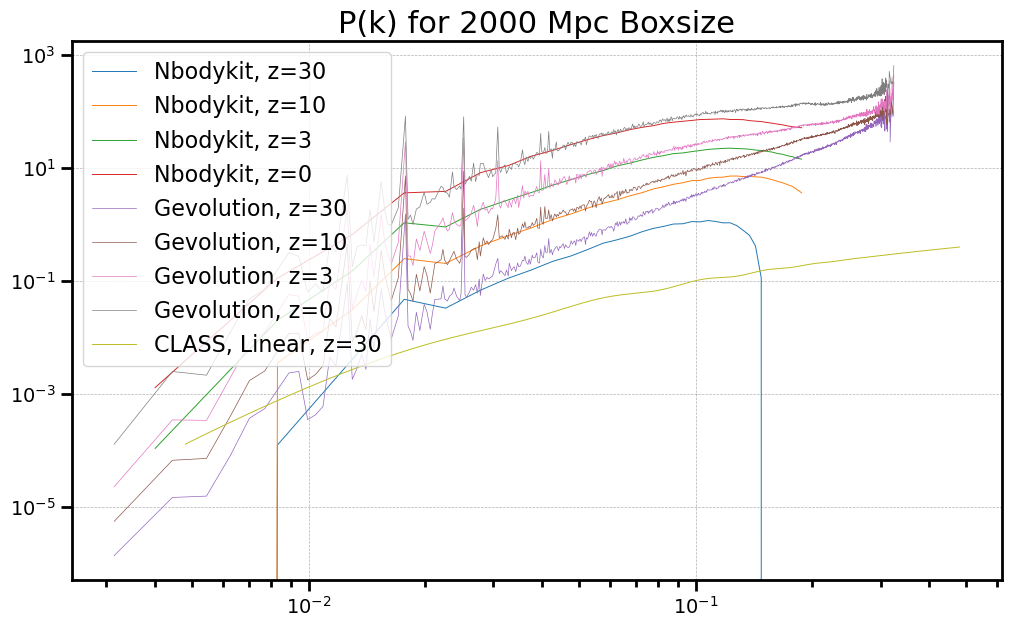

In [227]:
plt.loglog(array2000[0]['k'], (1/(2*np.pi**2))*array2000[0]['k']**3*(array2000[0]['power'].real- array2000[0].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=30')
plt.loglog(array2000[1]['k'], (1/(2*np.pi**2))*array2000[1]['k']**3*(array2000[1]['power'].real- array2000[1].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=10')
plt.loglog(array2000[2]['k'], (1/(2*np.pi**2))*array2000[2]['k']**3*(array2000[2]['power'].real- array2000[2].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=3')
plt.loglog(array2000[3]['k'], (1/(2*np.pi**2))*array2000[3]['k']**3*(array2000[3]['power'].real- array2000[3].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=0')

plt.loglog(delta2000[0][:, 0], delta2000[0][:, 1], label='Gevolution, z=30', linewidth=0.5)
plt.loglog(delta2000[1][:, 0], delta2000[1][:, 1], label='Gevolution, z=10', linewidth=0.5)
plt.loglog(delta2000[2][:, 0], delta2000[2][:, 1], label='Gevolution, z=3', linewidth=0.5)
plt.loglog(delta2000[3][:, 0], delta2000[3][:, 1], label='Gevolution, z=0', linewidth=0.5)

plt.title('P(k) for 2000 Mpc Boxsize')

plt.legend()

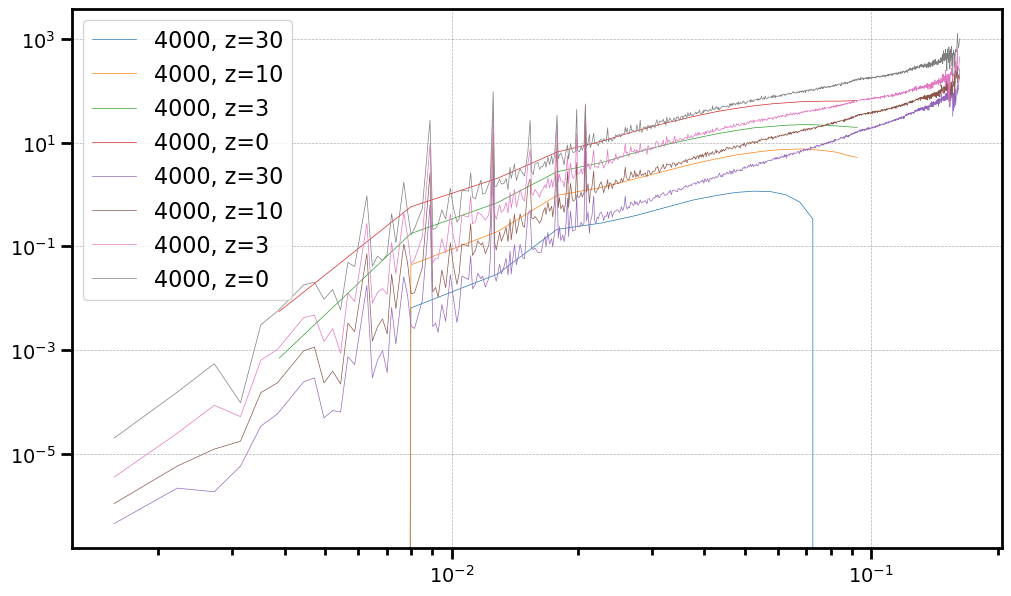

In [201]:
plt.loglog(array4000[0]['k'], (1/(2*np.pi**2))*array4000[0]['k']**3*(array4000[0]['power'].real- array4000[0].attrs['shotnoise']), linewidth=0.5, label = '4000, z=30')
plt.loglog(array4000[1]['k'], (1/(2*np.pi**2))*array4000[1]['k']**3*(array4000[1]['power'].real- array4000[1].attrs['shotnoise']), linewidth=0.5, label = '4000, z=10')
plt.loglog(array4000[2]['k'], (1/(2*np.pi**2))*array4000[2]['k']**3*(array4000[2]['power'].real- array4000[2].attrs['shotnoise']), linewidth=0.5, label = '4000, z=3')
plt.loglog(array4000[3]['k'], (1/(2*np.pi**2))*array4000[3]['k']**3*(array4000[3]['power'].real- array4000[3].attrs['shotnoise']), linewidth=0.5, label = '4000, z=0')

plt.loglog(delta4000[0][:, 0], delta4000[0][:, 1], label='4000, z=30', linewidth=0.5)
plt.loglog(delta4000[1][:, 0], delta4000[1][:, 1], label='4000, z=10', linewidth=0.5)
plt.loglog(delta4000[2][:, 0], delta4000[2][:, 1], label='4000, z=3', linewidth=0.5)
plt.loglog(delta4000[3][:, 0], delta4000[3][:, 1], label='4000, z=0', linewidth=0.5)

plt.legend()


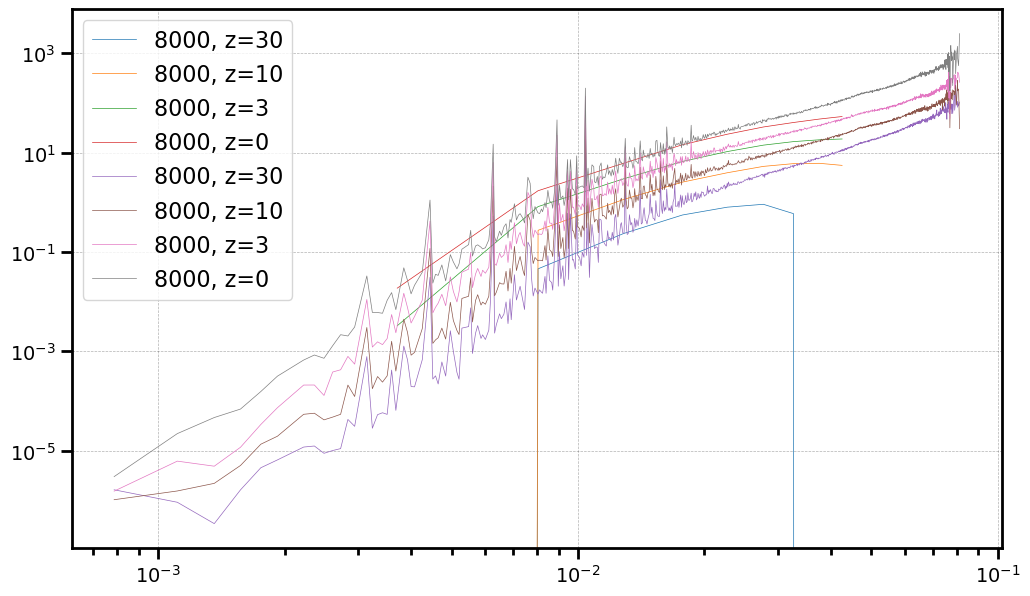

In [202]:
plt.loglog(array8000[0]['k'], (1/(2*np.pi**2))*array8000[0]['k']**3*(array8000[0]['power'].real- array8000[0].attrs['shotnoise']), linewidth=0.5, label = '8000, z=30')
plt.loglog(array8000[1]['k'], (1/(2*np.pi**2))*array8000[1]['k']**3*(array8000[1]['power'].real- array8000[1].attrs['shotnoise']), linewidth=0.5, label = '8000, z=10')
plt.loglog(array8000[2]['k'], (1/(2*np.pi**2))*array8000[2]['k']**3*(array8000[2]['power'].real- array8000[2].attrs['shotnoise']), linewidth=0.5, label = '8000, z=3')
plt.loglog(array8000[3]['k'], (1/(2*np.pi**2))*array8000[3]['k']**3*(array8000[3]['power'].real- array8000[3].attrs['shotnoise']), linewidth=0.5, label = '8000, z=0')

plt.loglog(delta8000[0][:, 0], delta8000[0][:, 1], label='8000, z=30', linewidth=0.5)
plt.loglog(delta8000[1][:, 0], delta8000[1][:, 1], label='8000, z=10', linewidth=0.5)
plt.loglog(delta8000[2][:, 0], delta8000[2][:, 1], label='8000, z=3', linewidth=0.5)
plt.loglog(delta8000[3][:, 0], delta8000[3][:, 1], label='8000, z=0', linewidth=0.5)

plt.legend()

We can plot all three boxsizes at the same redshift to compare the spectra. The different k-values seem reasonable. A larger box has a smaller Nyquist frequency (so the upper end of k is the smallest for the 8000 Mpc box), and fits a larger maximum wavelength (so has a smaller minimum k). 

However, these should line up with eachother in terms of power at each k value. So something seems awry. 

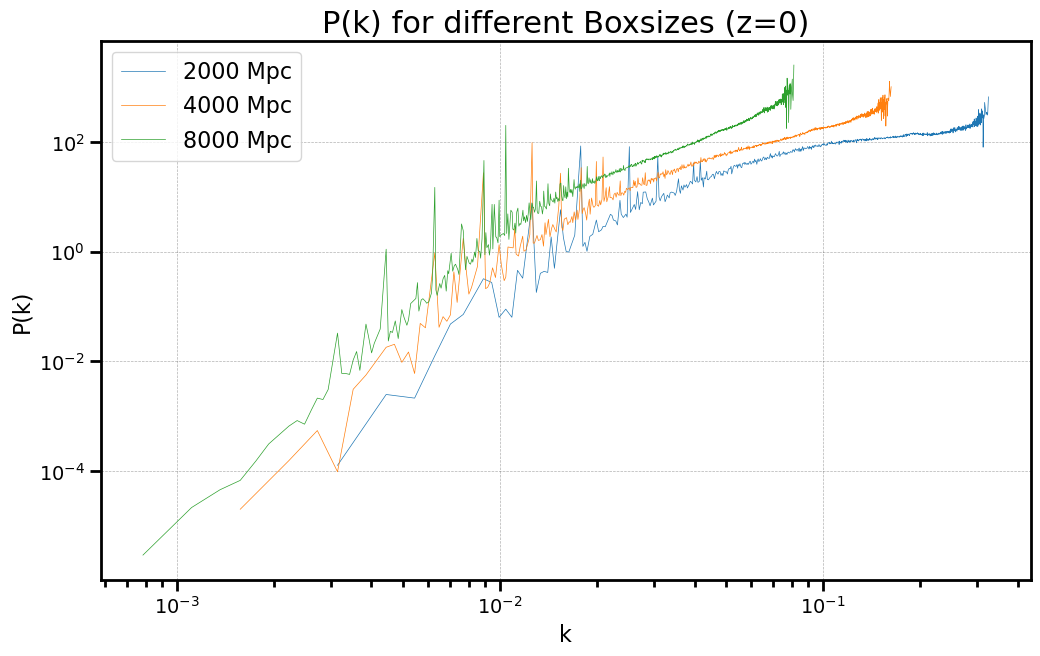

In [203]:
plt.loglog(delta2000[3][:, 0], delta2000[3][:, 1], label='2000 Mpc', linewidth=0.5)
#plt.loglog(array2000[3]['k'], (1/(2*np.pi**2))*array2000[3]['k']**3*(array2000[3]['power'].real- array2000[3].attrs['shotnoise']), linewidth = 0.7, label = '2000 Mpc, Nbodykit')
#plt.loglog(delta2000[1][:, 0], delta2000[1][:, 1], label='2000, z=10', linewidth=0.5)
#plt.loglog(delta2000[2][:, 0], delta2000[2][:, 1], label='2000, z=3', linewidth=0.5)
#plt.loglog(delta2000[3][:, 0], delta2000[3][:, 1], label='2000, z=0', linewidth=0.5)
#
plt.loglog(delta4000[3][:, 0], delta4000[3][:, 1], label='4000 Mpc', linewidth=0.5)
#plt.loglog(array4000[3]['k'], (1/(2*np.pi**2))*array4000[3]['k']**3*(array4000[3]['power'].real- array4000[3].attrs['shotnoise']), linewidth = 0.7, label = '4000 Mpc, Nbodykit')
#plt.loglog(delta4000[1][:, 0], delta4000[1][:, 1], label='4000, z=30', linewidth=0.5)
#plt.loglog(delta4000[2][:, 0], delta4000[2][:, 1], label='4000, z=10', linewidth=0.5)
#plt.loglog(delta4000[3][:, 0], delta4000[3][:, 1], label='4000, z=3', linewidth=0.5)

plt.loglog(delta8000[3][:, 0], delta8000[3][:, 1], label='8000 Mpc', linewidth=0.5)
#plt.loglog(array8000[3]['k'], (1/(2*np.pi**2))*array8000[3]['k']**3*(array8000[3]['power'].real- array8000[3].attrs['shotnoise']), linewidth = 0.7, label = '8000 Mpc, Nbodykit')
#plt.loglog(delta8000[1][:, 0], delta8000[1][:, 1], label='8000, z=30', linewidth=0.5)
#plt.loglog(delta8000[2][:, 0], delta8000[2][:, 1], label='8000, z=10', linewidth=0.5)
#plt.loglog(delta8000[3][:, 0], delta8000[3][:, 1], label='8000, z=3', linewidth=0.5)

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=0)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

Multiplying by a factor proportional to the simulation volume makes the lines lie on top of eachother. Coincidence or meaningful?

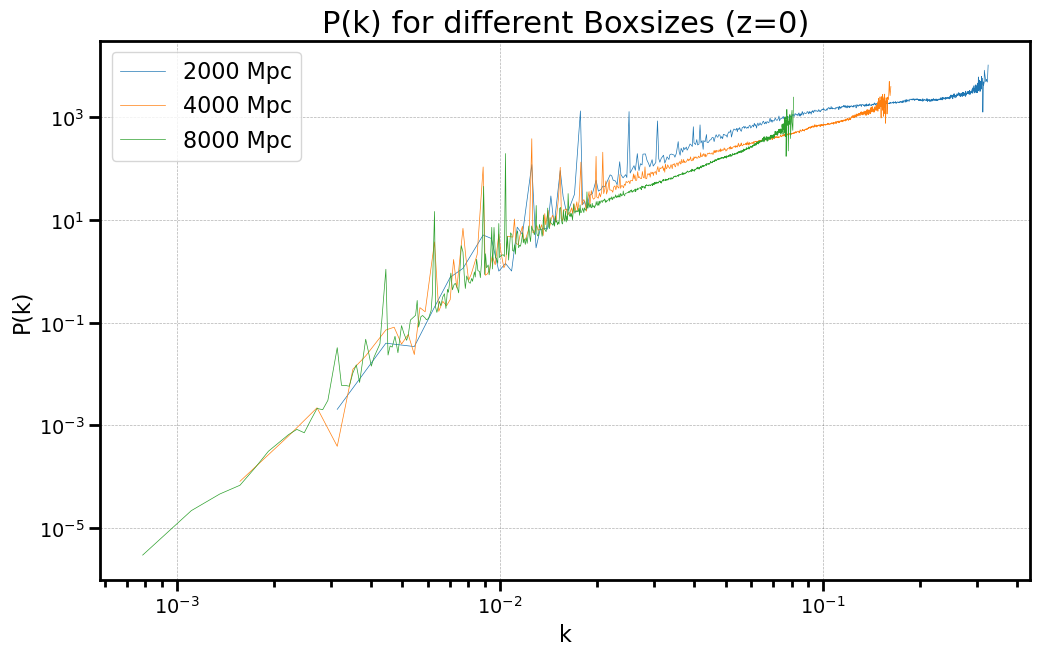

In [204]:
plt.loglog(delta2000[3][:, 0], 16*delta2000[3][:, 1], label='2000 Mpc', linewidth=0.5)
#
plt.loglog(delta4000[3][:, 0], 4*delta4000[3][:, 1], label='4000 Mpc', linewidth=0.5)

plt.loglog(delta8000[3][:, 0], delta8000[3][:, 1], label='8000 Mpc', linewidth=0.5)

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Boxsizes (z=0)')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

We can see the maximum k-value (and Nyquist frequency) changing with Ngrid more explicitly by plotting the same boxsize with two different values for Ngrid. 

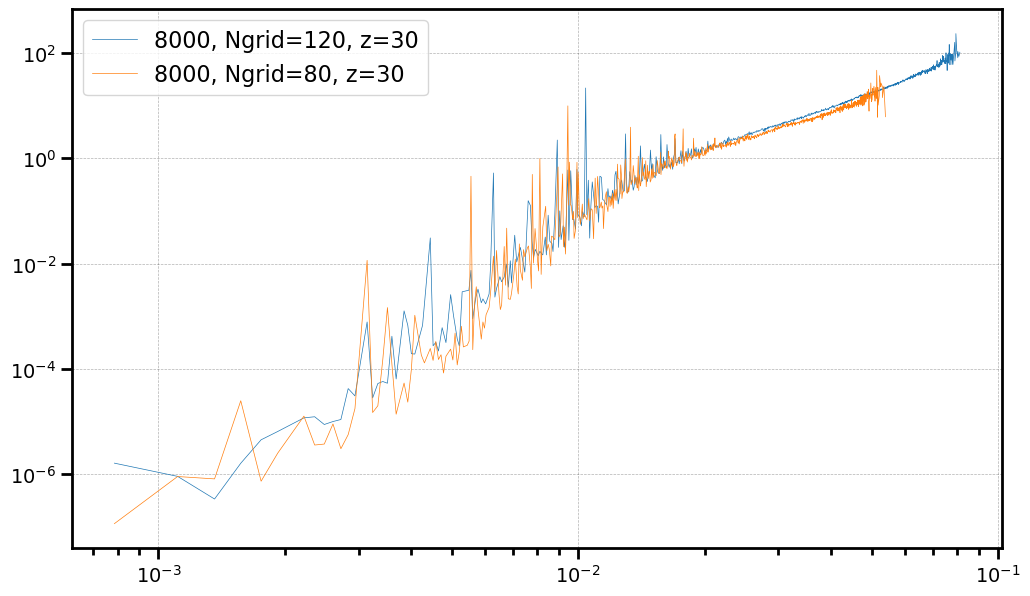

In [208]:
plt.loglog(delta8000[0][:, 0], delta8000[0][:, 1], label='8000, Ngrid=120, z=30', linewidth=0.5)
plt.loglog(delta8000_80[0][:, 0], delta8000_80[0][:, 1], label='8000, Ngrid=80, z=30', linewidth=0.5)
plt.legend()

Matters become worse as we compare to a power spectrum output by CLASS with identical cosmological parameters. Here's the CLASS power spectrum:

In [209]:
class_data =[]
for i in [30, 10, 3, 0]:
    data = read_dat_file('/Users/Io_1/Desktop/gevolution/classdata/classdata' + str(i)+ '.dat')
    class_data.append(data)

Text(0.5, 1.0, 'CLASS Power Spectrum, Dimensionful!')

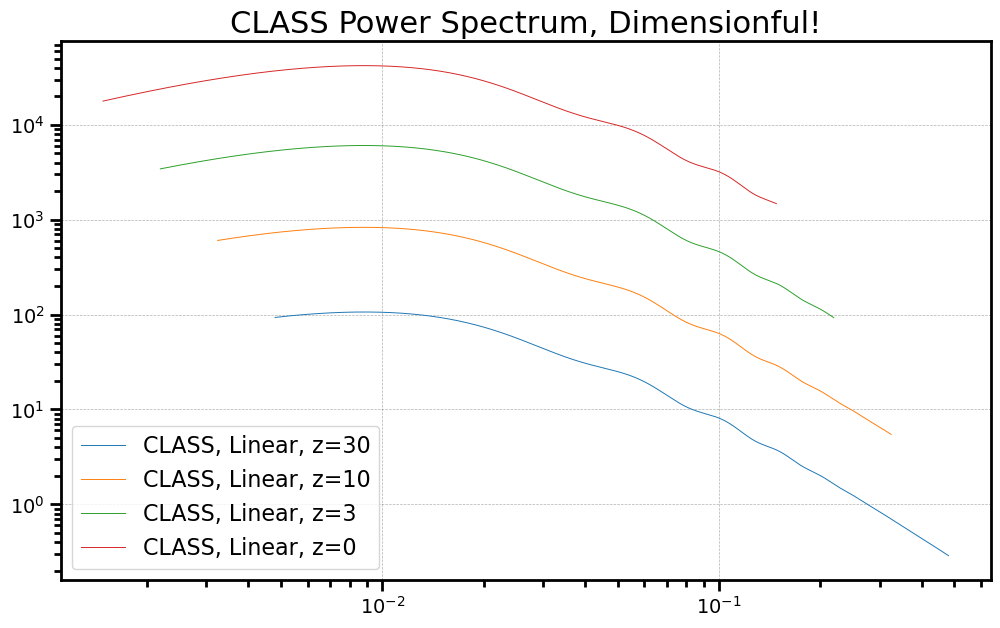

In [210]:
plt.loglog(class_data[0][0,:], class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
plt.loglog(class_data[1][0,:], class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
plt.loglog(class_data[2][0,:], class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=3')
plt.loglog(class_data[3][0,:], class_data[3][1,:], linewidth=0.7, label='CLASS, Linear, z=0')
plt.legend()
plt.title('CLASS Power Spectrum, Dimensionful!')

We have to make the CLASS spectrum dimensionless in order to compare. Seems like this should entail a multiplication by (k^3)/(2*pi^2), but that doesn't line up so well. Neither does the slope.

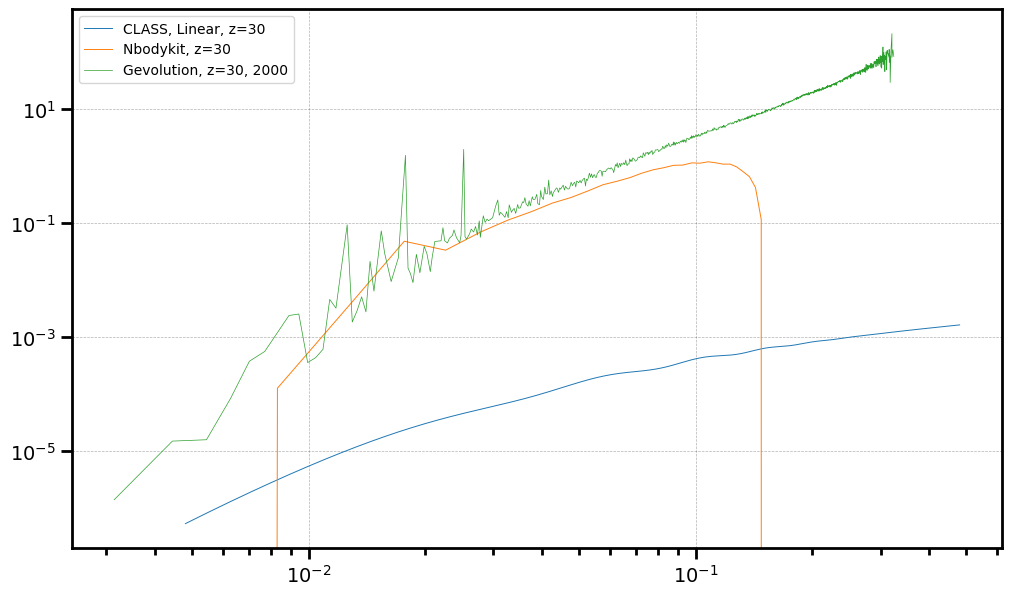

In [233]:
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
#plt.loglog(class_data[1][0,:], 4*np.pi*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
#plt.loglog(class_data[2][0,:], 4*np.pi*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=3')
#plt.loglog(class_data[3][0,:], 4*np.pi*class_data[3][0,:]**3*class_data[3][1,:], linewidth=0.7, label='CLASS, Linear, z=0')

#nonlinear doesnt change anything 
#plt.loglog(class_data[0][0,:], 4*np.pi**2*class_data[0][0,:]**3*class_data[0][2,:], linewidth=0.7, label='CLASS, Linear, z=30')
#plt.loglog(class_data[1][0,:], 4*np.pi**2*class_data[1][0,:]**3*class_data[1][2,:], linewidth=0.7, label='CLASS, Linear, z=10')
#plt.loglog(class_data[2][0,:], 4*np.pi**2*class_data[2][0,:]**3*class_data[2][2,:], linewidth=0.7, label='CLASS, Linear, z=3')
#plt.loglog(class_data[3][0,:], 4*np.pi**2*class_data[3][0,:]**3*class_data[3][2,:], linewidth=0.7, label='CLASS, Linear, z=0')

plt.loglog(array2000[0]['k'], (1/(2*np.pi**2))*array2000[0]['k']**3*(array2000[0]['power'].real- array2000[0].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=30')
#plt.loglog(array2000[1]['k'], (1/(2*np.pi**2))*array2000[1]['k']**3*(array2000[1]['power'].real- array2000[1].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=10')
#plt.loglog(array2000[2]['k'], (1/(2*np.pi**2))*array2000[2]['k']**3*(array2000[2]['power'].real- array2000[2].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=3')
#plt.loglog(array2000[3]['k'], (1/(2*np.pi**2))*array2000[3]['k']**3*(array2000[3]['power'].real- array2000[3].attrs['shotnoise']), linewidth = 0.7, label = 'Nbodykit, z=0')
#
plt.loglog(delta2000[0][:, 0], delta2000[0][:, 1], label='Gevolution, z=30, 2000', linewidth=0.5)
#plt.loglog(delta2000[1][:, 0], delta2000[1][:, 1], label='Gevolution, z=10, 2000', linewidth=0.5)
#plt.loglog(delta2000[2][:, 0], delta2000[2][:, 1], label='Gevolution, z=3, 2000', linewidth=0.5)
#plt.loglog(delta2000[3][:, 0], delta2000[3][:, 1], label='Gevolution, z=0, 2000', linewidth=0.5)

plt.legend(fontsize =10)

This is what happens if I keep Ngrid = 64 and vary tiling factor such that number density ~ (tiling factor)^3 / (Boxsize)^3 is a constant. So the number density in the simulation is constant but the resolution is decreasing as we go to a bigger simulation volume. 

I haven't been able to make sense of why this looks so wrong. 


| Boxsize | Ngrid | Tiling Factor|
|:--------:|:--------:|:--------:|
|  2000  |  64   |  16   |
|  4000  |  64  |  32  |
|  8000  |  64   |  64  |

In [212]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputs/output2/output2lcdm_pk00' + str(x)+'_delta.dat')
    d4000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputs/output4/output4lcdm_pk00' + str(x)+'_delta.dat')
    d8000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputs/output8/output8lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d4000, d8000

num_files = 4
delta20001 = []
delta40001 = []
delta80001 = []

for i in range(num_files):
    d2000, d4000, d8000= data_getter(i)
    delta20001.append(d2000)
    delta40001.append(d4000)
    delta80001.append(d8000)

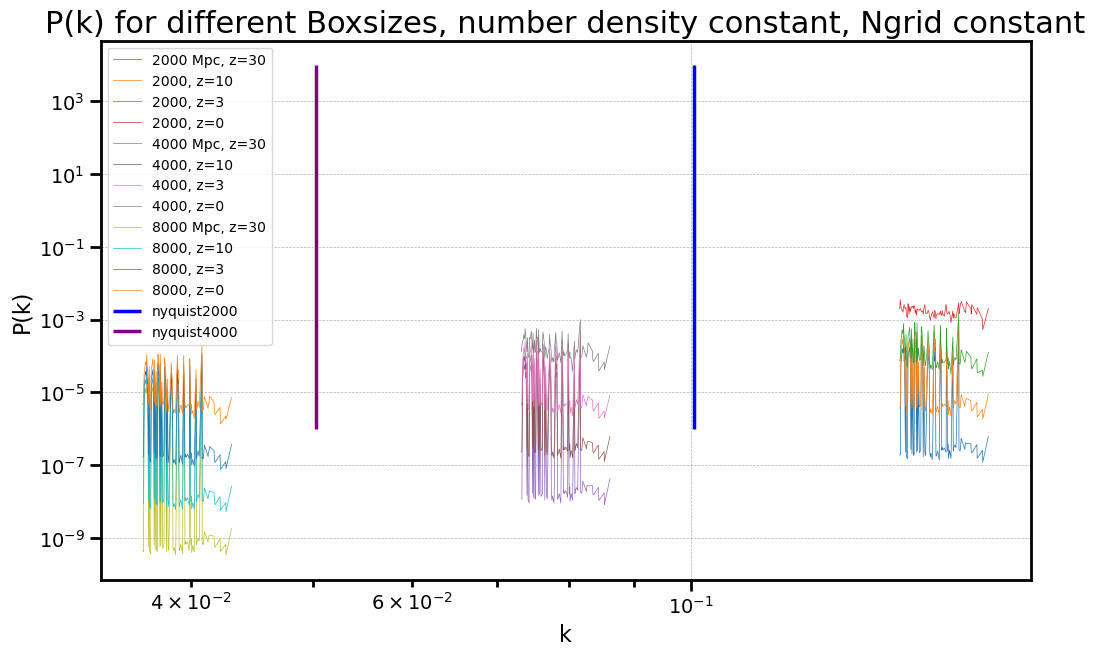

In [213]:
plt.loglog(delta20001[0][:, 0], delta20001[0][:, 1], label='2000 Mpc, z=30', linewidth=0.5)
plt.loglog(delta20001[1][:, 0], delta20001[1][:, 1], label='2000, z=10', linewidth=0.5)
plt.loglog(delta20001[2][:, 0], delta20001[2][:, 1], label='2000, z=3', linewidth=0.5)
plt.loglog(delta20001[3][:, 0], delta20001[3][:, 1], label='2000, z=0', linewidth=0.5)

plt.loglog(delta40001[0][:, 0], delta40001[0][:, 1], label='4000 Mpc, z=30', linewidth=0.5)
plt.loglog(delta40001[1][:, 0], delta40001[1][:, 1], label='4000, z=10', linewidth=0.5)
plt.loglog(delta40001[2][:, 0], delta40001[2][:, 1], label='4000, z=3', linewidth=0.5)
plt.loglog(delta40001[3][:, 0], delta40001[3][:, 1], label='4000, z=0', linewidth=0.5)

plt.loglog(delta80001[0][:, 0], delta80001[0][:, 1], label='8000 Mpc, z=30', linewidth=0.5)
plt.loglog(delta80001[1][:, 0], delta80001[1][:, 1], label='8000, z=10', linewidth=0.5)
plt.loglog(delta80001[2][:, 0], delta80001[2][:, 1], label='8000, z=3', linewidth=0.5)
plt.loglog(delta80001[3][:, 0], delta80001[3][:, 1], label='8000, z=0', linewidth=0.5)

plt.vlines(x=np.pi*64/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors = 'blue')
plt.vlines(x=np.pi*64/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors = 'purple')
#plt.vlines(x=np.pi*64/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors = 'red')

plt.title('P(k) for different Boxsizes, number density constant, Ngrid constant')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend(fontsize =10)

This is what happens when I also change Ngrid such that tiling factor/Ngrid and (tiling factor)^3/(Boxsize)^3 are both constants. In other words, the total number density is the same, and so is the spatial resolution. I think this should just be the same simulation at 3 sizes, but it clearly isn't.

| Boxsize | Ngrid | Tiling Factor|
|:--------:|:--------:|:--------:|
|  2000  |  24   |  16   |
|  4000  |  48  |  32  |
|  8000  |  96   |  64  |

In [214]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputs1/output2/lcdm_pk00' + str(x)+'_delta.dat')
    d4000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputs1/output4/lcdm_pk00' + str(x)+'_delta.dat')
    d8000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputs1/output8/lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d4000, d8000

num_files = 4
delta20002 = []
delta40002 = []
delta80002 = []

for i in range(num_files):
    d2000, d4000, d8000 = data_getter(i)
    delta20002.append(d2000)
    delta40002.append(d4000)
    delta80002.append(d8000)

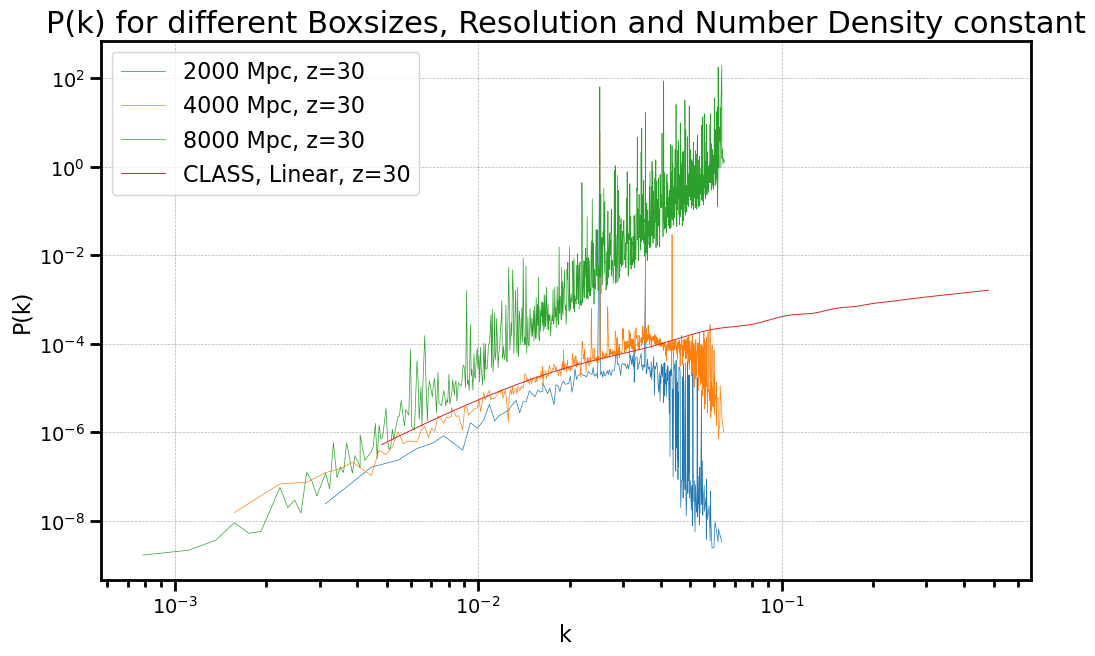

In [215]:
plt.loglog(delta20002[0][:, 0], delta20002[0][:, 1], label='2000 Mpc, z=30', linewidth=0.5)
#plt.loglog(delta20002[1][:, 0], delta20002[1][:, 1], label='2000, z=10', linewidth=0.5)
#plt.loglog(delta20002[2][:, 0], delta20002[2][:, 1], label='2000, z=3', linewidth=0.5)
#plt.loglog(delta20002[3][:, 0], delta20002[3][:, 1], label='2000, z=0', linewidth=0.5)

plt.loglog(delta40002[0][:, 0], delta40002[0][:, 1], label='4000 Mpc, z=30', linewidth=0.5)
#plt.loglog(delta40002[1][:, 0], delta40002[1][:, 1], label='4000, z=10', linewidth=0.5)
#plt.loglog(delta40002[2][:, 0], delta40002[2][:, 1], label='4000, z=3', linewidth=0.5)
#plt.loglog(delta40002[3][:, 0], delta40002[3][:, 1], label='4000, z=0', linewidth=0.5)

plt.loglog(delta80002[0][:, 0], delta80002[0][:, 3], label='8000 Mpc, z=30', linewidth=0.5)
#plt.loglog(delta80002[1][:, 0], delta80002[1][:, 1], label='8000, z=10', linewidth=0.5)
#plt.loglog(delta80002[2][:, 0], delta80002[2][:, 1], label='8000, z=3', linewidth=0.5)
#plt.loglog(delta80002[3][:, 0], delta80002[3][:, 1], label='8000, z=0', linewidth=0.5)
#
#plt.vlines(x=np.pi*24/2000, ymin=10e-7, ymax =10e3, label='nyquist')
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
#plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
#plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=3')
#plt.loglog(class_data[3][0,:], (1/(2*np.pi**2))*class_data[3][0,:]**3*class_data[3][1,:], linewidth=0.7, label='CLASS, Linear, z=0')

plt.title('P(k) for different Boxsizes, Resolution and Number Density constant')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

This is what happens if I keep tiling factor constant (16) and vary Ngrid such that the resolution is a constant.


| Boxsize | Ngrid | Tiling Factor|
|:--------:|:--------:|:--------:|
|  2000  |  16  |  16   |
|  4000  |  32  |  16  |
|  8000  |  64   |  16 |

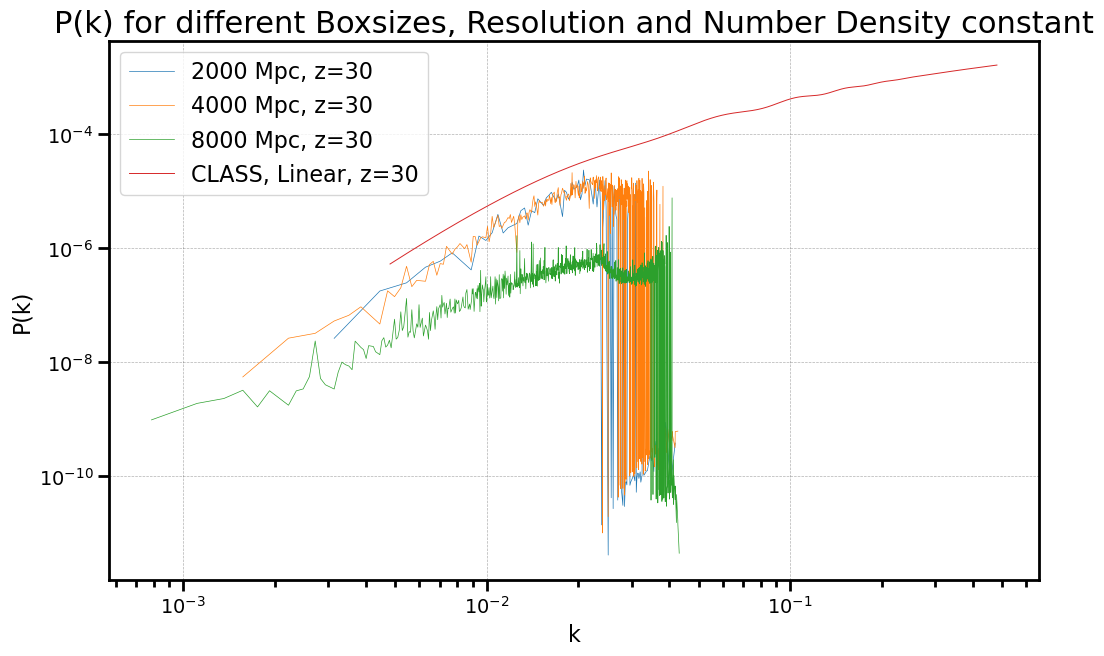

In [216]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputsres/output2/lcdm_pk00' + str(x)+'_delta.dat')
    d4000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputsres/output4/lcdm_pk00' + str(x)+'_delta.dat')
    d8000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputsres/output8/lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d4000, d8000

num_files = 4
delta2res = []
delta4res = []
delta8res = []

for i in range(num_files):
    d2000, d4000, d8000 = data_getter(i)
    delta2res.append(d2000)
    delta4res.append(d4000)
    delta8res.append(d8000)

plt.loglog(delta2res[0][:, 0], delta2res[0][:, 1], label='2000 Mpc, z=30', linewidth=0.5)
#plt.loglog(delta2res[1][:, 0], delta2res[1][:, 1], label='2000, z=10', linewidth=0.5)
#plt.loglog(delta2res[2][:, 0], delta2res[2][:, 1], label='2000, z=3', linewidth=0.5)
#plt.loglog(delta2res[3][:, 0], delta2res[3][:, 1], label='2000, z=0', linewidth=0.5)

plt.loglog(delta4res[0][:, 0], delta4res[0][:, 1], label='4000 Mpc, z=30', linewidth=0.5)
#plt.loglog(delta4res[1][:, 0], delta4res[1][:, 1], label='4000, z=10', linewidth=0.5)
#plt.loglog(delta4res[2][:, 0], delta4res[2][:, 1], label='4000, z=3', linewidth=0.5)
#plt.loglog(delta4res[3][:, 0], delta4res[3][:, 1], label='4000, z=0', linewidth=0.5)

plt.loglog(delta8res[0][:, 0], delta8res[0][:, 3], label='8000 Mpc, z=30', linewidth=0.5)
#plt.loglog(delta8res[1][:, 0], delta8res[1][:, 1], label='8000, z=10', linewidth=0.5)
#plt.loglog(delta8res[2][:, 0], delta8res[2][:, 1], label='8000, z=3', linewidth=0.5)
#plt.loglog(delta8res[3][:, 0], delta8res[3][:, 1], label='8000, z=0', linewidth=0.5)

#plt.vlines(x=np.pi*24/2000, ymin=10e-7, ymax =10e3, label='nyquist')
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
#plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
#plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=3')
#plt.loglog(class_data[3][0,:], (1/(2*np.pi**2))*class_data[3][0,:]**3*class_data[3][1,:], linewidth=0.7, label='CLASS, Linear, z=0')

plt.title('P(k) for different Boxsizes, Resolution and Number Density constant')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

In [217]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output16/lcdm_pk00' + str(x)+'_delta.dat')
    d4000 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output32/lcdm_pk00' + str(x)+'_delta.dat')
    #d8000 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output64/lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d4000#, d8000

num_files = 4
delta16 = []
delta32 = []
#delta64 = []

for i in range(num_files):
    d2000, d4000 = data_getter(i)
    delta16.append(d2000)
    delta32.append(d4000)
    #delta64.append(d8000)

For these I keep boxsize = 4000 and Ngrid=48, but change tiling factor. This also changes particle mass, which is strange because earlier keeping tiling factor the same and changing boxsize didn't impact particle mass!

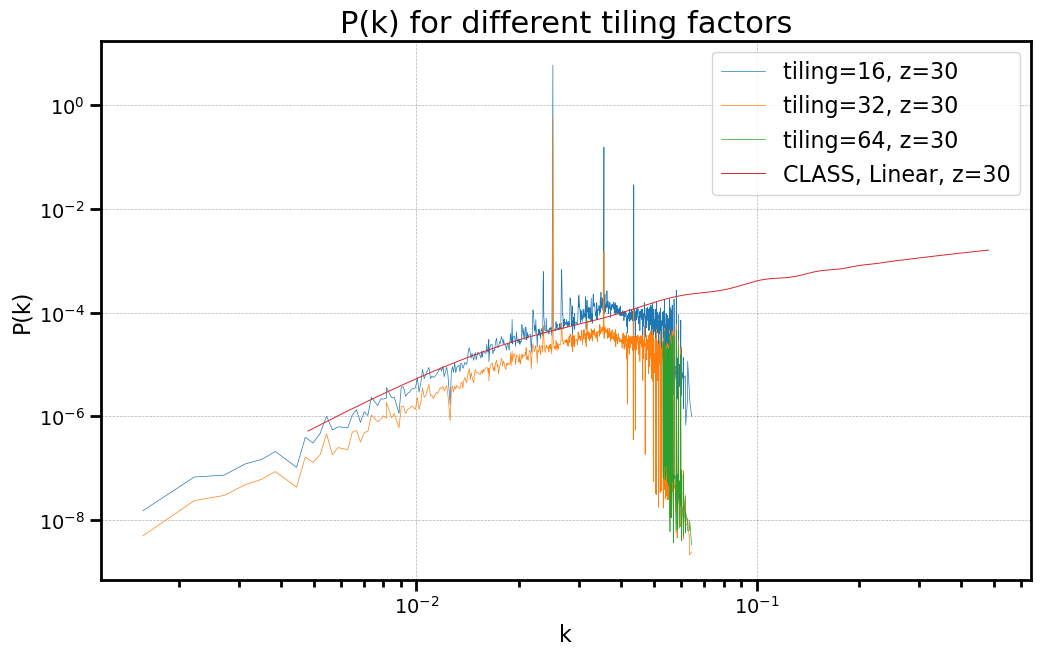

In [218]:
plt.loglog(delta16[0][:, 0], delta16[0][:, 1], label='tiling=16, z=30', linewidth=0.5)
#plt.loglog(delta16[1][:, 0], delta16[1][:, 1], label='tiling=16, z=10', linewidth=0.5)
#plt.loglog(delta16[2][:, 0], delta16[2][:, 1], label='tiling=16, z=3', linewidth=0.5)
#plt.loglog(delta16[3][:, 0], delta16[3][:, 1], label='tiling=16, z=0', linewidth=0.5)

plt.loglog(delta32[0][:, 0], delta32[0][:, 1], label='tiling=32, z=30', linewidth=0.5)
#plt.loglog(delta32[1][:, 0], delta32[1][:, 1], label='tiling=32, z=10', linewidth=0.5)
#plt.loglog(delta32[2][:, 0], delta32[2][:, 1], label='tiling=32, z=3', linewidth=0.5)
#plt.loglog(delta32[3][:, 0], delta32[3][:, 1], label='tiling=32, z=0', linewidth=0.5)

plt.loglog(delta64[0][:, 0], delta64[0][:, 1], label='tiling=64, z=30', linewidth=0.5)
#plt.loglog(delta64[1][:, 0], delta64[1][:, 1], label='tiling=64, z=10', linewidth=0.5)
#plt.loglog(delta64[2][:, 0], delta64[2][:, 1], label='tiling=64, z=3', linewidth=0.5)
#plt.loglog(delta64[3][:, 0], delta64[3][:, 1], label='tiling=64, z=0', linewidth=0.5)

#plt.vlines(x=np.pi*48/4000, ymin=10e-7, ymax =10e3, label='nyquist')
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

plt.title('P(k) for different tiling factors')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()

Below is the same for a boxsize of 8000 Mpc. 

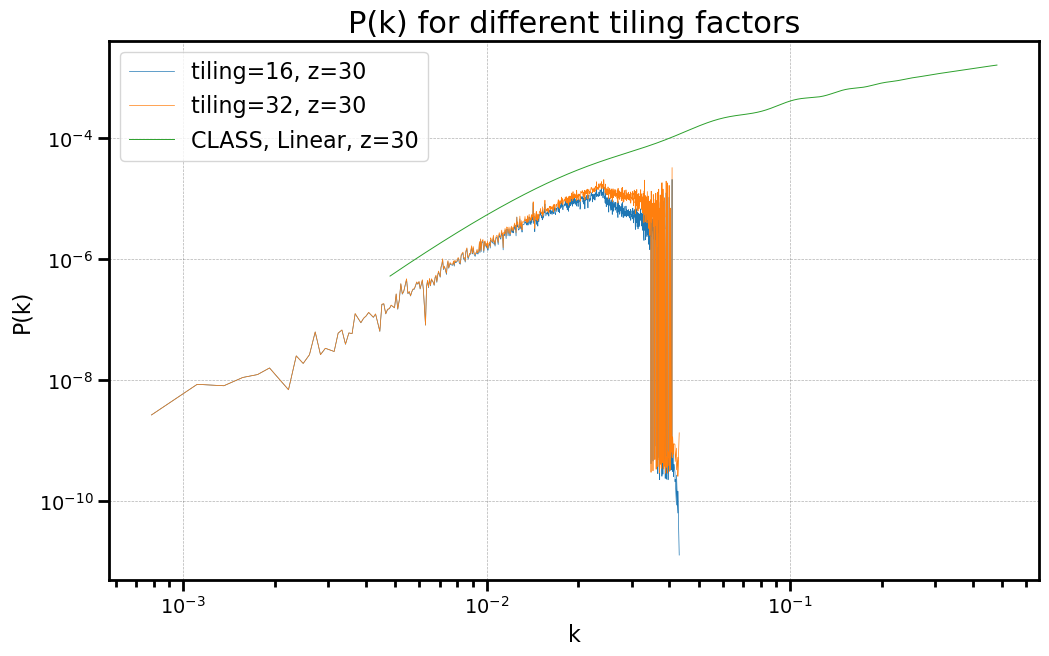

In [219]:
def data_getter(x):
    d2000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputstile/output16/lcdm_pk00' + str(x)+'_delta.dat')
    d4000 = read_dat_file('/Users/Io_1/Desktop/gevolution/outputstile/output32/lcdm_pk00' + str(x)+'_delta.dat')
    #d8000 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output64/lcdm_pk00' + str(x)+'_delta.dat')
    return d2000, d4000#, d8000

num_files = 4
delta16 = []
delta32 = []
#delta64 = []

for i in range(num_files):
    d2000, d4000 = data_getter(i)
    delta16.append(d2000)
    delta32.append(d4000)
    #delta64.append(d8000)

plt.loglog(delta16[0][:, 0], delta16[0][:, 1], label='tiling=16, z=30', linewidth=0.5)
#plt.loglog(delta16[1][:, 0], delta16[1][:, 1], label='tiling=16, z=10', linewidth=0.5)
#plt.loglog(delta16[2][:, 0], delta16[2][:, 1], label='tiling=16, z=3', linewidth=0.5)
#plt.loglog(delta16[3][:, 0], delta16[3][:, 1], label='tiling=16, z=0', linewidth=0.5)

plt.loglog(delta32[0][:, 0], delta32[0][:, 1], label='tiling=32, z=30', linewidth=0.5)
#plt.loglog(delta32[1][:, 0], delta32[1][:, 1], label='tiling=32, z=10', linewidth=0.5)
#plt.loglog(delta32[2][:, 0], delta32[2][:, 1], label='tiling=32, z=3', linewidth=0.5)
#plt.loglog(delta32[3][:, 0], delta32[3][:, 1], label='tiling=32, z=0', linewidth=0.5)

#plt.loglog(delta64[0][:, 0], delta64[0][:, 1], label='tiling=64, z=30', linewidth=0.5)
#plt.loglog(delta64[1][:, 0], delta64[1][:, 1], label='tiling=64, z=10', linewidth=0.5)
#plt.loglog(delta64[2][:, 0], delta64[2][:, 1], label='tiling=64, z=3', linewidth=0.5)
#plt.loglog(delta64[3][:, 0], delta64[3][:, 1], label='tiling=64, z=0', linewidth=0.5)

#plt.vlines(x=np.pi*48/4000, ymin=10e-7, ymax =10e3, label='nyquist')
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

plt.title('P(k) for different tiling factors')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()



In [220]:
def read_h5_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        dataset = file[dataset_name]
        data = np.array(dataset)
    return data

Particle mass changes as you change tiling factor. My guess is that Gevolution keeps the total mass density constant? So increasing tiling factor decreases particle mass.

In [75]:
file_path = '/Users/Io_1/Desktop/gevolution/tileoutputs/output16/lcdm_snap001_cdm.h5'

part_info = read_h5_file(file_path, 'part_info')
part_info

array([(1.19036133e-06, 0, 0, b'part_simple')],
      dtype=[('mass', '<f8'), ('relativistic', '<i4'), ('type_name_size', '<i4'), ('type_name', 'S64')])

In [76]:
file_path = '/Users/Io_1/Desktop/gevolution/tileoutputs/output32/lcdm_snap001_cdm.h5'

part_info = read_h5_file(file_path, 'part_info')
part_info

array([(1.48795166e-07, 0, 0, b'part_simple')],
      dtype=[('mass', '<f8'), ('relativistic', '<i4'), ('type_name_size', '<i4'), ('type_name', 'S64')])

In [100]:
file_path = '/Users/Io_1/Desktop/gevolution/tileoutputs/output64/lcdm_snap001_cdm.h5'

part_info = read_h5_file(file_path, 'part_info')
part_info

array([(1.85993958e-08, 0, 0, b'part_simple')],
      dtype=[('mass', '<f8'), ('relativistic', '<i4'), ('type_name_size', '<i4'), ('type_name', 'S64')])

Finally we can try plotting power spectra for other variables. Below I plot T00 and rhoN (Newtonian density field?), along with delta. In the manual we are instructed: "spectra of T00 and rhoN are in units of proper density squared, whereas the choices delta and deltaN correspond to the respective dimensionless density contrasts." This explains the differences in normalization. 

In [107]:
def data_getter(x):
    T0016 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output16/lcdm_pk00' + str(x)+'_T00.dat')
    T0032 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output32/lcdm_pk00' + str(x)+'_T00.dat')
    T0064 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output64/lcdm_pk00' + str(x)+'_T00.dat')
    return T0016, T0032, T0064

num_files = 4
T0016 = []
T0032 = []
T0064 = []

for i in range(num_files):
    T016, T032, T064 = data_getter(i)
    T0016.append(T016)
    T0032.append(T032)
    T0064.append(T064)

In [110]:
def data_getter(x):
    rhoN32 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output32/lcdm_pk00' + str(x)+'_rhoN.dat')
    rhoN16 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output16/lcdm_pk00' + str(x)+'_rhoN.dat')
    rhoN64 = read_dat_file('/Users/Io_1/Desktop/gevolution/tileoutputs/output64/lcdm_pk00' + str(x)+'_rhoN.dat')
    return rhoN16, rhoN32, rhoN64

num_files = 4
rhoN16 = []
rhoN32 = []
rhoN64 = []

for i in range(num_files):
    r16, r32, r64 = data_getter(i)
    rhoN16.append(r16)
    rhoN32.append(r32)
    rhoN64.append(r64)

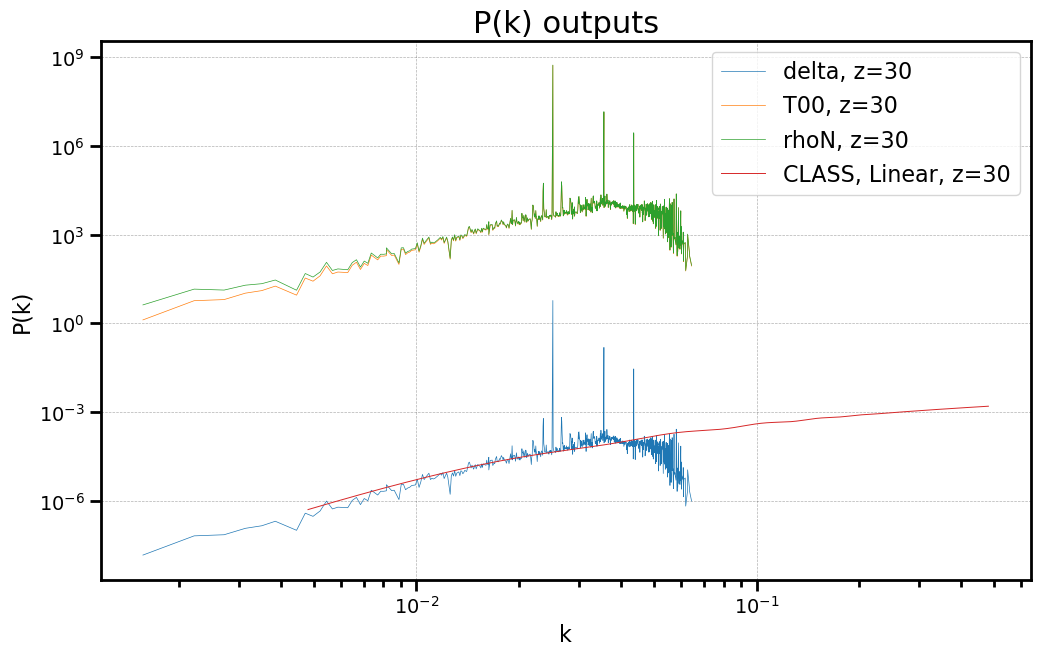

In [115]:
plt.loglog(delta16[0][:, 0], delta16[0][:, 1], label='delta, z=30', linewidth=0.5)
plt.loglog(T0016[0][:, 0], T0016[0][:, 1], label='T00, z=30', linewidth=0.5)
plt.loglog(rhoN16[0][:, 0], rhoN16[0][:, 1], label='rhoN, z=30', linewidth=0.5)

#plt.vlines(x=np.pi*48/4000, ymin=10e-7, ymax =10e3, label='nyquist')
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=30')

plt.title('P(k) outputs')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()